In [13]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import scipy.stats as stats
from IPython.display import display, Latex

In [2]:
df = pd.read_excel("extra_data_example.xlsx", sheet_name=0)

COLORS = mpl.colormaps["viridis"](np.linspace(0.8,0.2,5))

df.head()

,Material 1 Cell Viability,Material 2 Cell Viability,Material 3 Cell Viability,Material 4 Cell Viability,Material 5 Cell Viability
0,89.636019,36.337570,82.138034,77.959568,96.495528
1,83.022464,9.832694,76.750271,60.890488,50.656390
2,88.389779,33.625268,80.024641,84.399342,81.065215
3,95.473542,25.500794,83.302190,93.427135,63.233430
4,95.084492,6.899070,79.977589,78.029090,50.931293


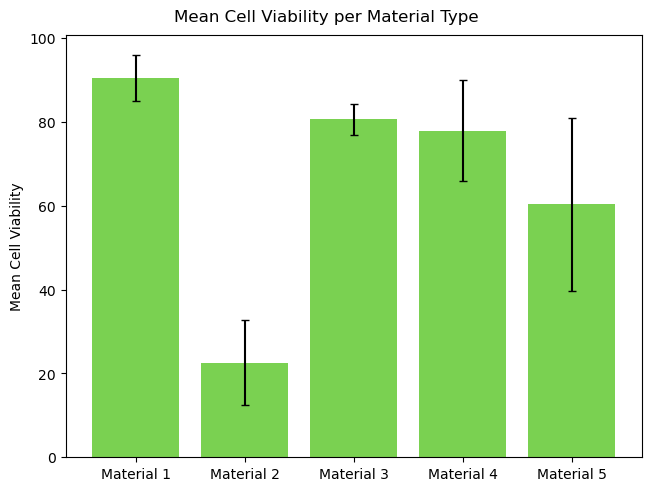

In [3]:
fig = plt.figure(layout='constrained')

plt.bar([f"Material {i}" for i in range(1,6)], df.mean(), yerr=df.std(), color=COLORS[0], capsize=3)
plt.ylabel("Mean Cell Viability")
plt.suptitle("Mean Cell Viability per Material Type")

plt.show()

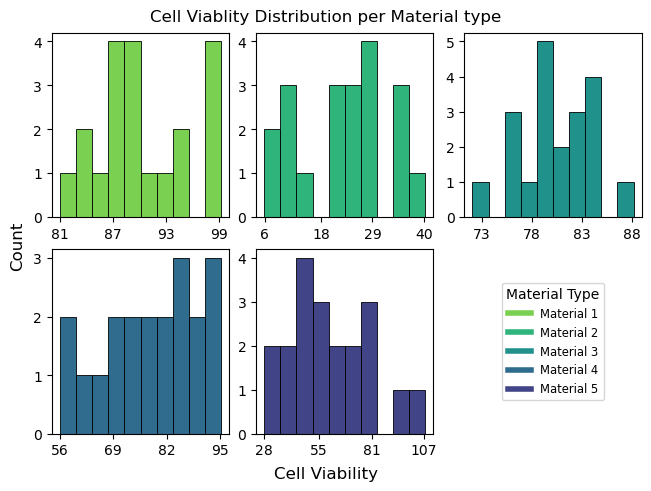

In [62]:
fig, axs = plt.subplots(2, 3, constrained_layout=True)
for i in range(5):
    ax = axs[i//3, i%3]
    ax.set_xticks([*map(int, np.linspace(min(df.iloc[:,i])+1, max(df.iloc[:,i]), 4))])
    df.iloc[:,i].hist(color=COLORS[i], edgecolor="black", linewidth=0.6, grid=False, ax=ax)

axs[-1,-1].legend(handles=[mpl.lines.Line2D([0], [0], color=COLORS[i], lw=4) for i in range(5)],
                  labels=[f"Material {i+1}" for i in range(5)],
                  title="Material Type", loc='center', fontsize='small')

axs[-1,-1].axis('off')
plt.suptitle("Cell Viablity Distribution per Material type")
fig.supxlabel("Cell Viability")
fig.supylabel("Count")
plt.show()

In [5]:
for i in range(5):
    print(f"Material {i+1}:", stats.shapiro(df.iloc[:,i]))

Material 1: ShapiroResult(statistic=0.9450613047923301, pvalue=0.29826235582609695)
Material 2: ShapiroResult(statistic=0.9464559687917486, pvalue=0.3164733559444973)
Material 3: ShapiroResult(statistic=0.9737578703192492, pvalue=0.8313773586100368)
Material 4: ShapiroResult(statistic=0.9525846495518314, pvalue=0.4080345151758666)
Material 5: ShapiroResult(statistic=0.9668363915694076, pvalue=0.687175775623706)


$\Rightarrow$ data is normally distributed

In [6]:
stats.f_oneway(*[df.iloc[:, i] for i in range(5)])

F_onewayResult(statistic=99.65745910469758, pvalue=3.984222520241905e-33)

$\Rightarrow$ there is significant difference between some of the materials

In [39]:
#Post-hoc test - Bonferroni Correction
ca = 0.05/(len(df.columns) * (len(df.columns) - 1) / 2)
print('Corrected alpha: ', ca)

for i in range(len(df.columns)):
    for j in range(len(df.columns)):
        if i >= j: continue
        ttest = stats.ttest_ind(df.iloc[:, i], df.iloc[:, j])
        display(Latex(f'${"+-"[int(ttest.pvalue < ca)]}H_0$ Mat. {i+1} and {j+1}: {ttest}'))

Corrected alpha:  0.005


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

$\Rightarrow$ All materials have significant differences except 3 vs. 4